In [1]:
import numpy as np
from datetime import datetime
import pandas as pd 
import time
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import json
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

### Load Data

In [2]:
# load the x data
df_x = pd.read_json("data_store/x.json",encoding="utf-8")
# load the y data
df_y = pd.read_json("data_store/y.json",encoding="utf-8")

In [3]:
# show df_x
df_x

,date,code,AR,ARBR,ATR14,ATR6,BR,MAWVAD,money_flow_20,PSY,...,EMA5,EMAC10,EMAC20,MAC10,MAC20,MAC5,MAC60,MACDC,MFI14,price_no_fq
0,2016-01-04,000001.XSHE,110.409767,25.644803,30.437857,29.033333,84.764964,-407161.365140,1.488764e+10,58.333333,...,1.046541,1.059017,1.068195,1.074086,1.066999,1.050498,1.053507,-0.013772,57.368374,11.33
1,2016-01-05,000001.XSHE,133.235675,32.318378,31.708571,33.403333,100.917298,-713159.294704,1.515273e+10,58.333333,...,1.026953,1.041909,1.055058,1.057316,1.056656,1.033443,1.046810,-0.017497,55.751228,11.40
2,2016-01-06,000001.XSHE,139.986358,33.275754,31.976429,28.563333,106.710604,-616696.534018,1.514257e+10,58.333333,...,1.010643,1.024741,1.039347,1.037976,1.043308,1.012405,1.035999,-0.017391,60.331501,11.53
3,2016-01-07,000001.XSHE,124.793163,32.442695,34.452143,36.213333,92.350467,-581030.864769,1.482092e+10,50.000000,...,1.043129,1.065157,1.086256,1.079817,1.094725,1.045642,1.091781,-0.024276,56.393160,10.94
4,2016-01-08,000001.XSHE,96.158562,14.735525,33.515714,39.805000,81.423037,-624083.124657,1.514966e+10,58.333333,...,1.017695,1.039558,1.062557,1.051693,1.073646,1.013318,1.074454,-0.024213,54.615205,11.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419986,2017-10-30,601989.XSHG,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000e+00,0.000000,...,0.992277,1.003613,1.039523,0.998546,1.031826,0.987076,1.147711,0.003604,41.556585,6.21
419987,2017-10-31,601989.XSHG,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000e+00,0.000000,...,0.992277,1.003613,1.039523,0.998546,1.031826,0.987076,1.147711,0.003604,41.556585,6.21
419988,2017-11-01,601989.XSHG,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000e+00,0.000000,...,0.992277,1.003613,1.039523,0.998546,1.031826,0.987076,1.147711,0.003604,41.556585,6.21
419989,2017-11-02,601989.XSHG,NaN,NaN,0.000000,0.000000,NaN,0.000000,0.000000e+00,0.000000,...,0.992277,1.003613,1.039523,0.998546,1.031826,0.987076,1.147711,0.003604,41.556585,6.21


In [4]:
# show df_y
df_y

,date,code,close_0,close_1,close_5,change_5,change_5_class6
0,2016-01-04,000001.XSHE,8.72,8.77,8.28,-5.587229,2
1,2016-01-05,000001.XSHE,8.77,8.87,8.32,-6.200676,1
2,2016-01-06,000001.XSHE,8.87,8.42,8.24,-2.137767,2
3,2016-01-07,000001.XSHE,8.42,8.56,8.29,-3.154206,2
4,2016-01-08,000001.XSHE,8.56,8.28,8.05,-2.777778,2
...,...,...,...,...,...,...,...
419979,2021-09-15,603993.XSHG,7.88,7.59,6.82,-10.144928,1
419980,2021-09-16,603993.XSHG,7.59,7.28,6.25,-14.148352,1
419981,2021-09-17,603993.XSHG,7.28,7.17,6.24,-12.970711,1
419982,2021-09-22,603993.XSHG,7.17,7.13,5.90,-17.251052,1


### Pre_process Data

In [5]:
# record some important infor
attr_list = df_x.columns[2:]
print("number of attrs:",len(attr_list))
date_list = list(set(df_x.sort_values(by = ["date"],ascending = True)["date"].tolist()))
print("number of dates:",len(date_list))

number of attrs: 100
number of dates: 1400


In [6]:
# merge to a df
df = df_y[["date","code","change_5_class6"]]
df = pd.merge(df,df_x, how = "left", on=['date',"code"])
df["date"] = df["date"].astype("str")
df["date+code"] = df["date"] + df["code"]
df = df.sort_values(by = ["date","code"],ascending = True).reset_index(drop=True)
del df_x; del df_y
df

,date,code,change_5_class6,AR,ARBR,ATR14,ATR6,BR,MAWVAD,money_flow_20,...,EMAC10,EMAC20,MAC10,MAC20,MAC5,MAC60,MACDC,MFI14,price_no_fq,date+code
0,2016-01-04,000001.XSHE,2,110.409767,25.644803,30.437857,29.033333,84.764964,-4.071614e+05,1.488764e+10,...,1.059017,1.068195,1.074086,1.066999,1.050498,1.053507,-0.013772,57.368374,11.33,2016-01-04000001.XSHE
1,2016-01-04,000002.XSHE,4,312.139041,79.080897,65.299286,0.000000,233.058144,2.309413e+05,4.327219e+10,...,0.840825,0.772377,0.829881,0.742805,0.883960,0.619546,0.040482,82.748595,24.43,2016-01-04000002.XSHE
2,2016-01-04,000012.XSHE,1,98.126464,-26.912569,19.307857,17.405000,125.039033,-6.536162e+06,1.517055e+10,...,1.109035,1.072007,1.171313,1.057604,1.113364,0.924347,-0.022349,33.045483,12.02,2016-01-04000012.XSHE
3,2016-01-04,000027.XSHE,1,41.843723,-7.018343,5.064286,5.770000,48.862066,-1.141257e+06,4.974648e+09,...,1.111346,1.142363,1.130788,1.133758,1.099636,1.182364,-0.017570,45.792142,8.84,2016-01-04000027.XSHE
4,2016-01-04,000039.XSHE,1,107.936618,5.712969,23.883571,28.660000,102.223649,4.725451e+05,1.032765e+10,...,1.104506,1.101068,1.129907,1.095927,1.106506,1.057071,-0.016443,55.344783,19.05,2016-01-04000039.XSHE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418484,2021-09-23,601998.XSHG,4,134.586466,34.586466,0.130714,0.140000,100.000000,-3.005437e+06,2.792454e+09,...,1.020880,1.023238,1.030482,1.024013,1.014035,1.028692,-0.007453,66.797598,4.56,2021-09-23601998.XSHG
418485,2021-09-23,603019.XSHG,2,85.265027,11.873144,2.497857,2.721667,73.391882,-6.313294e+06,9.515408e+09,...,1.011434,1.030726,1.018858,1.032641,0.991835,1.071730,-0.007758,54.387590,27.68,2021-09-23603019.XSHG
418486,2021-09-23,603288.XSHG,6,87.035920,42.629073,20.126429,20.596667,44.406846,-1.344370e+06,1.610087e+10,...,0.983878,1.026795,0.973793,1.020758,0.967766,1.198244,0.014243,51.241326,91.58,2021-09-23603288.XSHG
418487,2021-09-23,603806.XSHG,5,85.697999,0.094546,30.885714,29.653333,85.603452,-3.028309e+06,2.756114e+10,...,1.125779,1.152676,1.141486,1.206028,1.104321,1.085498,-0.058926,27.627275,118.04,2021-09-23603806.XSHG


### Data Makeup

In [7]:
# see the null
print("null:",df.isna().sum().tolist())

null: [0, 0, 0, 5767, 5770, 0, 0, 5672, 143, 0, 0, 294, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 525, 7675, 9209, 9098, 0, 0, 416, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6087, 0, 0, 6092, 3722, 0, 0, 0, 0, 0, 0, 0, 0, 1569, 0, 0, 0, 0, 0, 0, 0, 64329, 0, 0, 0, 16093, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 300, 0]


In [8]:
# use mean to makeup
for column in list(df.columns[df.isnull().sum() > 0]):
    mean_val = df[column].mean()
    df[column].fillna(mean_val, inplace=True)

In [9]:
# see the null
print("null:",df.isna().sum().tolist())

null: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### Split

In [10]:
# select the proper features, 40
# emotion      10
# momentum     9
# style        10
# technical    6
# risk         5
feature_after_selection = ["turnover_volatility","TVSTD20","money_flow_20","PSY","TVSTD6","VOL20","VEMA5","VSTD10","AR","VOL5"\
                          ,"CR20","ROC20","PLRC24","CCI20","Rank1M","TRIX10","bear_power","Price1M","Volume1M"\
                          ,"beta","raw_beta","momentum","relative_strength","daily_standard_deviation","cumulative_range","liquidity","historical_sigma","earnings_yield","residual_volatility"\
                          ,"boll_down","MAC60","MAC5","EMA5","boll_up","MFI14"\
                          ,"Variance20","sharpe_ratio_60","Kurtosis60","Skewness20","Variance60"]

In [11]:
# df2 is after feature selection
df = df[["date","code","date+code","change_5_class6"]+feature_after_selection]

In [12]:
# normalization
df_head = df[["date","code","date+code","change_5_class6"]]
df = df[feature_after_selection]
df = df.apply(lambda x: (x - np.mean(x)) / (np.std(x)))
df["date"] = df_head["date"]
df["code"] = df_head["code"]
df["date+code"] = df_head["date+code"]
df["change_5_class6"] = df_head["change_5_class6"]
df = df[["date","code","date+code","change_5_class6"]+feature_after_selection]

In [13]:
# show df
df

,date,code,date+code,change_5_class6,turnover_volatility,TVSTD20,money_flow_20,PSY,TVSTD6,VOL20,...,MAC60,MAC5,EMA5,boll_up,MFI14,Variance20,sharpe_ratio_60,Kurtosis60,Skewness20,Variance60
0,2016-01-04,000001.XSHE,2016-01-04000001.XSHE,2,-0.435430,0.214222,0.211755,0.789359,-0.034070,-0.443810,...,0.499503,1.899282,2.140090,0.482742,0.250531,-0.073582,-0.064485,-0.042116,-1.590157,-0.107066
1,2016-01-04,000002.XSHE,2016-01-04000002.XSHE,4,1.455386,6.014729,1.809708,-2.032050,-0.577101,0.068429,...,-3.800818,-4.399061,-4.674200,-1.098450,1.808267,0.367318,4.463847,0.046645,1.171341,0.361022
2,2016-01-04,000012.XSHE,2016-01-04000012.XSHE,1,4.428400,0.981925,0.227682,-0.339205,0.332859,2.809058,...,-0.780404,4.276828,4.654546,3.034158,-1.242310,0.836763,0.498180,-0.527004,0.175036,0.801722
3,2016-01-04,000027.XSHE,2016-01-04000027.XSHE,1,0.219208,-0.412115,-0.346312,0.225077,-0.423002,0.595005,...,1.776407,3.757645,3.979902,1.614170,-0.459971,0.082410,-0.269418,-0.224848,-1.916469,0.367512
4,2016-01-04,000039.XSHE,2016-01-04000039.XSHE,1,0.903521,0.056879,-0.044957,0.789359,-0.144505,0.793123,...,0.534820,4.017463,4.069581,1.544837,0.126331,0.305813,-0.103791,-0.206025,-0.006952,0.336555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418484,2021-09-23,601998.XSHG,2021-09-23601998.XSHG,4,-0.777767,-0.538118,-0.469162,-0.903487,-0.476186,-0.818708,...,0.253600,0.520279,0.576296,-0.147408,0.829259,-0.142540,-0.475895,-0.338093,-0.567469,-0.331435
418485,2021-09-23,603019.XSHG,2021-09-23603019.XSHG,2,-0.295383,-0.299501,-0.090683,1.353640,-0.221401,0.096991,...,0.680083,-0.319309,-0.035264,0.235382,0.067582,-0.091136,-0.135553,0.279224,-1.060638,0.034171
418486,2021-09-23,603288.XSHG,2021-09-23603288.XSHG,6,-0.650748,0.307479,0.280056,0.225077,0.200234,-0.714497,...,1.933769,-1.229580,-1.132306,1.222382,-0.125522,0.096599,-0.526219,-0.235480,-1.340404,0.125959
418487,2021-09-23,603806.XSHG,2021-09-23603806.XSHG,5,-0.422945,0.086530,0.925230,-0.339205,0.387720,-0.007090,...,0.816517,3.934828,3.742271,3.770857,-1.574858,0.692225,0.022617,-0.891398,0.039411,1.451418


In [14]:
# get stock list 
stock_list = df["code"].unique()

In [15]:
# generate x
dict_stock_data_df = {}
for i in tqdm(stock_list):
    X_1_values = df[df["code"]==i].values
    dict_stock_data_df[i] = X_1_values

100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [00:33<00:00,  8.97it/s]


In [16]:
# the dict of x
dict_x1 = {}
for i in tqdm(stock_list):
    for j in range(39,len(dict_stock_data_df[i])):
        tmp_dict = {}
        tmp_dict["info"] = dict_stock_data_df[i][j][:4]
        item_data = []
        for k in range(39,-1,-1):
            item_data.append(dict_stock_data_df[i][j-k][4:].tolist())
        tmp_dict["data"] = np.array(item_data)
        dict_x1[dict_stock_data_df[i][j][2]] = tmp_dict
    del tmp_dict
    del item_data

100%|████████████████████████████████████████████████████████████████████████████████| 300/300 [02:32<00:00,  1.96it/s]


In [17]:
# generate x and y(tmp)
y = []
X = []
for i in dict_x1.values():
    y.append(i["info"][:4].tolist())
    X.append(i["data"])
print(len(y),len(X))

406789 406789


In [18]:
# generate df_3(finally)
del df
df_3 = pd.DataFrame(y)
df_3.columns = ["date","code","uid","change_5_class6"]
df_3["data"] = X
df_3 = df_3.sort_values(by = ["date","code"],ascending = True).reset_index(drop=True)
print(df_3.shape)
df_3.head()

(406789, 5)


,date,code,uid,change_5_class6,data
0,2016-03-04,000001.XSHE,2016-03-04000001.XSHE,3,"[[-0.4354301410472256, 0.21422212182948214, 0...."
1,2016-03-04,000002.XSHE,2016-03-04000002.XSHE,4,"[[1.455385976410924, 6.014728567511042, 1.8097..."
2,2016-03-04,000012.XSHE,2016-03-04000012.XSHE,2,"[[4.428400294684117, 0.9819245462201567, 0.227..."
3,2016-03-04,000027.XSHE,2016-03-04000027.XSHE,1,"[[0.21920839607847664, -0.41211473509258106, -..."
4,2016-03-04,000039.XSHE,2016-03-04000039.XSHE,1,"[[0.9035209851910816, 0.05687903693482957, -0...."


In [24]:
# save the data 
# df_3.iloc[353700:,:4].reset_index(drop=True).to_excel("data_store_y_poss/nn.xlsx")

In [ ]:
# generate X
X = df_3.drop(["date","code","uid","change_5_class6"], axis = 1)
X = np.array(X["data"].tolist())

In [ ]:
# save X
np.save('data_store/cnn_df3_X.npy',X )

In [ ]:
# del memory
del X

In [ ]:
# generate Y
y = df_3['change_5_class6']
y = np.array(y.tolist())

In [ ]:
# save X
np.save('data_store/cnn_df3_y.npy',y )

### Load X and y

In [1]:
from google.cloud import storage
BUCKET = "finance584"

In [2]:
client = storage.Client()
print("Client created using default project: {}".format(client.project))

Client created using default project: fast-haiku-332223


In [3]:
bucket = client.get_bucket(BUCKET)
print("Bucket name: {}".format(bucket.name))
print("Bucket location: {}".format(bucket.location))
print("Bucket storage class: {}".format(bucket.storage_class))

Bucket name: finance584
Bucket location: US-EAST1
Bucket storage class: STANDARD


In [4]:
# # save to data
# blob = bucket.blob("Model_CNN_0.ipynb")
# source_file_name = "Model_CNN_0.ipynb"
# blob.upload_from_filename(source_file_name)
# print("File uploaded to {}.".format(bucket.name))

In [5]:
# # download data
# blob = bucket.blob("data_store/cnn_df3_y.npy")
# output_file_name = "cnn_df3_y.npy"
# blob.download_to_filename(output_file_name)
# print("Downloaded blob {} to {}.".format(blob.name, output_file_name))

In [6]:
# Load X and y
import numpy as np
from datetime import datetime
import pandas as pd 
import time
import os
import matplotlib.pyplot as plt
import matplotlib as mpl
import json
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

blob = bucket.get_blob("data_store/cnn_df3_X.npy")
with blob.open("rb") as f:
    X = np.load(f)
    
blob = bucket.get_blob("data_store/cnn_df3_y.npy")
with blob.open("rb") as f:
    y = np.load(f)

In [7]:
# Reshape X
X = X.reshape([406789,40,40,1])
y = y.reshape([406789,1])

In [8]:
# items:406789
# split to train and test
# from 2016-01-04 to 2020-12-31; from 2021-01-04 to 2021-09-23
X_train = X[:353700]
y_train = y[:353700]
X_test = X[353700:]
y_test = y[353700:]
# set validation
X_val = X_train[-50000:]
y_val = y_train[-50000:]
X_train = X_train[:-50000]
y_train = y_train[:-50000]

In [9]:
# print the shape
print("X_train shape:",X_train.shape)
print("y_train shape:",y_train.shape)
print("X_val shape:",X_val.shape)
print("y_val shape:",y_val.shape)
print("X_test shape:",X_test.shape)
print("y_test shape:",y_test.shape)

X_train shape: (303700, 40, 40, 1)
y_train shape: (303700, 1)
X_val shape: (50000, 40, 40, 1)
y_val shape: (50000, 1)
X_test shape: (53089, 40, 40, 1)
y_test shape: (53089, 1)


### Train

In [10]:
import tensorflow as tf
from tensorflow.keras import *
from tensorflow import keras

In [11]:
model = models.Sequential()
model.add(layers.Conv2D(40, (3, 3),activation='relu',strides = 2, padding='same',input_shape=(40, 40, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(60, (3, 3),strides=2, padding='same',activation='relu',kernel_regularizer=regularizers.l2(l=0.01)))
model.add(layers.Conv2D(80, (3, 3), padding='same',activation='relu',kernel_regularizer=regularizers.l2(l=0.01)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(units=320,activation="relu"))
model.add(layers.Dense(units=160,activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=7, activation="softmax"))

2021-11-15 04:23:23.860588: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 20, 20, 40)        400       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 40)        0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 10, 40)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 60)          21660     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 80)          43280     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 80)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2, 2, 80)          0

In [13]:
# tf.keras.utils.plot_model(
#     model,
#     to_file="model.png",
#     show_shapes=True,
#     show_layer_names=True,
#     rankdir="TB",
#     expand_nested=True,
#     dpi=80,
# )

In [14]:
# plot the loss and acc, set the callbacks
# reference https://blog.csdn.net/wyx100/article/details/81096192
class Hist_Callbacks(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}
 
    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('accuracy'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_accuracy'))
 
    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('accuracy'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_accuracy'))
        
    def get_loss_and_acc(self):
        call_list = {}
        call_list["train_loss"] = self.losses["epoch"]
        call_list["train_acc"] = self.accuracy["epoch"]
        call_list["val_loss"] = self.val_loss["epoch"]
        call_list["val_acc"] = self.val_acc["epoch"]
        return call_list
        
    def loss_plot_loss(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        plt.title('Loss of Model')
        plt.ylim(0,5)
        # plot the loss, train
        plt.plot(iters, self.losses[loss_type], 'r', label='train_loss')
        # plot the loss, val
        plt.plot(iters, self.val_loss[loss_type], 'b', label='val_loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('loss')
        plt.legend(loc="upper right")
        plt.show()
        
    def loss_plot_acc(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        plt.title('Accuracy of Model')
        plt.ylim(0, 1)
        # plot the acc, train
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train_acc')
        # plot the acc, val
        plt.plot(iters, self.val_acc[loss_type], 'b', label='val_acc')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc')
        plt.legend(loc="upper right")
        plt.show()

In [15]:
# create history
history = Hist_Callbacks()
#opt = tf.keras.optimizers.SGD(learning_rate=0.9)
#opt = "adam"
#opt = keras.optimizers.Adam(learning_rate=0.3)
opt = "adam"
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.fit(X_train, y_train, epochs=10,batch_size=400,verbose = 2,
                    validation_data=(X_val, y_val), callbacks = [history])

2021-11-15 04:23:25.775606: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
760/760 - 96s - loss: 1.6808 - accuracy: 0.2727 - val_loss: 1.6956 - val_accuracy: 0.2462
Epoch 2/10
760/760 - 94s - loss: 1.6145 - accuracy: 0.2851 - val_loss: 1.6777 - val_accuracy: 0.2583
Epoch 3/10
760/760 - 95s - loss: 1.6072 - accuracy: 0.2906 - val_loss: 1.6888 - val_accuracy: 0.2529
Epoch 4/10
760/760 - 97s - loss: 1.6018 - accuracy: 0.2964 - val_loss: 1.6977 - val_accuracy: 0.2550
Epoch 5/10
760/760 - 97s - loss: 1.5949 - accuracy: 0.3023 - val_loss: 1.7002 - val_accuracy: 0.2619
Epoch 6/10
760/760 - 95s - loss: 1.5879 - accuracy: 0.3064 - val_loss: 1.6999 - val_accuracy: 0.2584
Epoch 7/10
760/760 - 95s - loss: 1.5804 - accuracy: 0.3104 - val_loss: 1.7055 - val_accuracy: 0.2587
Epoch 8/10
760/760 - 93s - loss: 1.5719 - accuracy: 0.3173 - val_loss: 1.7098 - val_accuracy: 0.2558
Epoch 9/10
760/760 - 97s - loss: 1.5642 - accuracy: 0.3213 - val_loss: 1.7232 - val_accuracy: 0.2593
Epoch 10/10
760/760 - 96s - loss: 1.5564 - accuracy: 0.3268 - val_loss: 1.7294 - val_accura

In [17]:
# save the model
model.save('model/cnn_model')

2021-11-15 04:39:21.074458: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: model/cnn_model/assets


### Evaluate

In [18]:
# evaluate train and val
score = model.evaluate(X_train, y_train, verbose=0)
print('Test score of train dataset:', score[0])
print('Test accuracy of train dataset:', score[1])
score = model.evaluate(X_val, y_val, verbose=0)
print('Test score of validation dataset:', score[0])
print('Test accuracy of validation dataset:', score[1])

Test score of train dataset: 1.52716863155365
Test accuracy of train dataset: 0.3460223972797394
Test score of validation dataset: 1.7293753623962402
Test accuracy of validation dataset: 0.24719999730587006


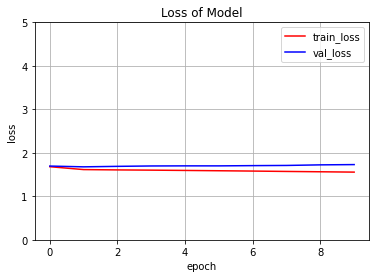

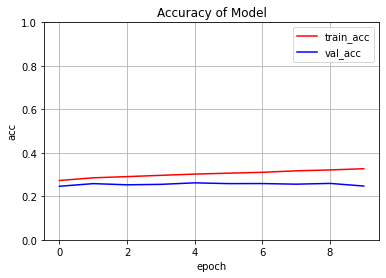

In [19]:
# plot the loss and accuracy of train and val 
loss_type = "epoch"
history.loss_plot_loss(loss_type)
history.loss_plot_acc(loss_type)

In [20]:
# evaluate test data
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score of test dataset:', score[0])
print('Test accuracy of test dataset:', score[1])

Test score of test dataset: 1.7319843769073486
Test accuracy of test dataset: 0.2457571178674698


In [21]:
# get the data
call_return = history.get_loss_and_acc()
call_return_df = pd.DataFrame(call_return)
call_return_df

,train_loss,train_acc,val_loss,val_acc
0,1.680844,0.272743,1.695591,0.24616
1,1.614535,0.285107,1.677728,0.25832
2,1.607207,0.290566,1.688833,0.25294
3,1.601756,0.296441,1.697711,0.25498
4,1.594945,0.302285,1.700166,0.26190
5,1.587917,0.306375,1.699889,0.25840
6,1.580438,0.310402,1.705541,0.25866
7,1.571896,0.317251,1.709790,0.25584
8,1.564219,0.321301,1.723245,0.25934
9,1.556379,0.326826,1.729376,0.24720


In [22]:
# save the data
! pip install openpyxl
call_return_df.to_excel('cnn_loss_acc.xlsx')

### Load Model And Print the Posibility

In [23]:
load_model = keras.models.load_model('model/cnn_model')

In [24]:
y_pred = load_model.predict(X_test)
y_pred

array([[8.9179721e-06, 6.2918320e-02, 2.1374737e-01, ..., 2.1036124e-01,
        2.4601200e-01, 8.2667463e-02],
       [5.7919738e-07, 7.9482105e-03, 1.0856589e-01, ..., 3.1850109e-01,
        2.9595050e-01, 5.2636597e-02],
       [8.1715276e-05, 1.0382776e-01, 2.1131481e-01, ..., 1.7449126e-01,
        2.0729107e-01, 1.4125441e-01],
       ...,
       [2.3421067e-06, 2.4043947e-02, 2.0269439e-01, ..., 2.3553161e-01,
        2.4045031e-01, 8.5575849e-02],
       [4.1850794e-06, 1.4636040e-01, 1.6890833e-01, ..., 1.1739147e-01,
        1.7944807e-01, 2.7772009e-01],
       [2.1654279e-05, 1.4623256e-01, 2.2682458e-01, ..., 1.6689876e-01,
        1.8187927e-01, 1.2175106e-01]], dtype=float32)

In [25]:
np.save('y_cnn.npy',y_pred)